## Динамика

В этом проекте приведены решения задач из раздела "Динамика" теоретической механики.

In [2]:
from numpy import cos, sin, array, arctan
from math import pi
from scipy.optimize import root
from scipy.integrate import quad
rad = lambda x: x * pi / 180
grad = lambda x: 180 * x / pi

def derivative(f,a,method='central',h=0.01):
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        print("Method must be 'central', 'forward' or 'backward'.")

1. Точка массой m = 4 кг движется по горизонтальной прямой с ускорением а = 0,3 t. Определить модуль силы, действующей на точку в направлении ее движения в момент времени t = 3 с.

In [4]:
m = 4
a = lambda t : 0.3 * t
ts = 3

force = m * a(ts)
force

3.5999999999999996

2. Точка массой m = 14 кг движется по горизонтальной оси Ох с ускорением ах = ln t. Определить модуль силы, действующей на точку в направлении движения в момент времени t = 5 с.

In [20]:
from math import log

m = 14
ax = lambda t : log(t)
ts = 5

force = m * ax(ts)
force

22.532130774077405

3. Моторная лодка массой m = 200 кг после остановки мотора движется прямолинейно, преодолевая сопротивление воды. Сила сопротивления R = 4v^2. Определить ускорение лодки, когда ее скорость v = 5 м/с.

In [22]:
m = 200
R = lambda v : 4 * v**2
vs = 5
- R(vs) / m

-0.5

4. Трактор, двигаясь с ускорением а = 1 м/с^2 по горизонтальному участку пути, перемещает нагруженные сани массой 600 кг. Определить силу тяги на крюке, если коэффициент трения скольжения саней f = 0,04.  
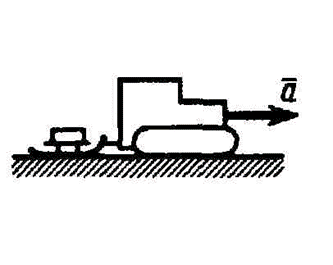

In [23]:
a = 1
g = 9.8061
m = 600
f = 0.04
m * (f * g + a)

835.3464

5. Материальная точка массой m = 50 кг из состояния покоя движется по гладкой горизонтальной направляющей под действием силы F = 50 Н, вектор которой образует постоянный угол   α = 20 grad  с направляющей. Определить путь, пройденный точкой за время t = 20 с.

In [24]:
m = 50
F = 50
alpha = rad(20)
ts = 20
F / m * cos(alpha) * ts**2/2

187.9385241571817

6. Груз массой m = 25 кг подвешен к пружине с коэффициентом жесткости с = 800 Н/м и находится в свободном прямолинейном вертикальном колебательном движении. Определить модуль ускорения груза в момент времени, когда центр тяжести груза находится на расстоянии 5 см от положения статического равновесия.

In [28]:
m = 25
c = 800
l = 0.05
(c * l) / m

1.6

7. Тело подвешено к пружине и совершает свободные вертикальные колебания с периодом Т = 0,5 с. Определить массу точки, если коэффициент жесткости пружины с = 200 Н/м.

In [33]:
T = 0.5
c = 200
mass = lambda m : T - 2 * pi * (m / c)**0.5
root(mass, 0).x[0]

1.2665147955292082

8. Постоянная по модулю и направлению сила действует на тело в течение 10 с. Найти модуль ее импульса за это время, если проекции силы на оси координат Fx = 3Н, Fy = 4Н.

In [36]:
Fx = 3
Fy = 4
t = 10
F = (Fx**2 + Fy**2)**0.5
F * t

50.0

9. Материальная точка массой 2 кг движется в плоскости Оху согласно уравнениям х = sin πt, у = 0,5t^2. Определить модуль количества движения точки в момент времени t = 1,5 с.

In [37]:
m = 2
x = lambda t : sin(pi * t)
y = lambda t : 0.5 * t**2
ts = 1.5
vx = lambda t : derivative(x, t)
vy = lambda t : derivative(y, t)
m * (vx(ts)**2 + vy(ts)**2)**0.5

3.0000000000000027

10. Материальная точка массой m = 1 кг движется по окружности со скоростью v = 1 м/с. Определить кинетическую энергию этой точки.

In [38]:
m = 1
v = 1
0.5 * m * v**2

0.5

11. Свободное падение материальной точки массой m начинается из состояния покоя. Пренебрегая сопротивлением воздуха, определить путь, пройденный точкой к моменту времени, когда она имеет скорость 3 м/с.

In [44]:
v = 3
ts = lambda t : 3 - (g * t)
ts = root(ts, 0).x[0]
g * (ts)**2 / 2

0.45889803285709924

12. На материальную точку подействовал ударный импульс s = 10k. Скорость до удара v1 = -10k, скорость после удара v2 = 5k. Определить массу материальной точки.

In [57]:
s = lambda k : 10 * k
v1 = lambda k : - 10 * k
v2 = lambda k : 5 * k
m = lambda k : s(k) / (v2(k) - v1(k))

m(1)

0.6666666666666666

13. Шарик без начальной скорости падает с высоты h1 = 1,5 м и после удара по горизонтальной преграде поднимается на высоту h2 = 0,8м. Определить коэффициент восстановления при ударе.

In [59]:
h1 = 1.5
h2 = 0.8

v1 = (2 * g * h1)**0.5
v2 = (2 * g * h2)**0.5

v2 / v1 # коэффициент восстановления - отношение скоростей после к до

0.7302967433402214

14. Определить в кН среднюю силу удара молотка массой m = 0,5 кг при абсолютно неупругом ударе по наковальне, если скорость до удара v = 10 м/с и время удара 0,0002 с.

In [61]:
m = 0.5
v = 10
t = 0.0002

m * v / t / 1000

25.0

15. Тело массой m1 = 1 кг ударяет со скоростью v10 = 2 м/с по неподвижному телу массой m2 = 3 кг. Принимая, что удар абсолютно неупругий, определить потери кинетической энергии.

In [66]:
m1 = 1
v1 = 2
m2 = 3
p1 = m1 * v1 # Импульс тела массой m1 до удара
v2 = p1 / (m1 + m2) # общая скорость после удара равна
0.5 *((m1 * v1**2) - (m1 + m2) * v2**2)

1.5